In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
# get data
# hsx
df = pd.read_csv('CafeF.HSX.Upto29.03.2019.csv')
# vn30 ky 1 2019
frames = [df[df['<Ticker>']== 'CMG']]
data = pd.concat(frames)

In [26]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(16, 9))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18)
    
def train_test_split(df, test_size=0.1):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    print(len(train_data), len(test_data))
    return train_data, test_data  

In [27]:
df, test = train_test_split(data, test_size=0.1)

2048 227


In [28]:
df.drop(['<Ticker>','<Open>','<High>','<Low>','<Volume>'], inplace=True, axis = 1)
test.drop(['<Ticker>','<Open>','<High>','<Low>','<Volume>'], inplace=True, axis = 1)

/Users/nhatson/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


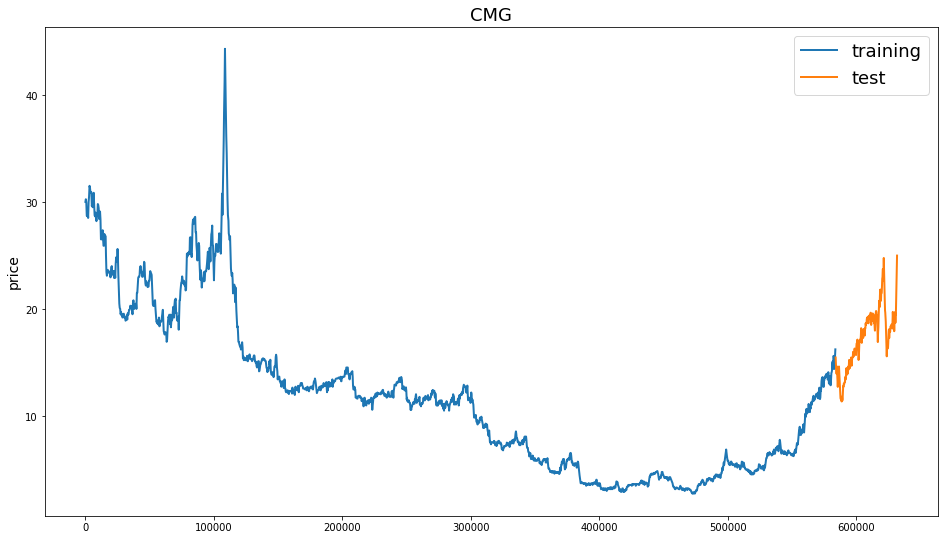

In [30]:
target_col = '<Close>'
line_plot(df[target_col], test[target_col], 'training', 'test', title='CMG')

In [31]:
df['<DTYYYYMMDD>'] = pd.to_datetime(df['<DTYYYYMMDD>'].astype(str), format = '%Y%m%d')

/Users/nhatson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
model = Prophet()
df.columns = ['ds', 'y']
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


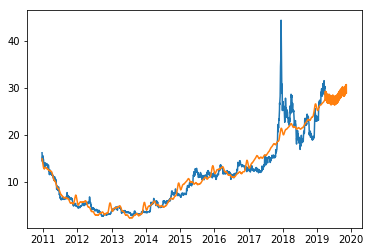

In [35]:
future_stock_data = model.make_future_dataframe(periods=227, freq = 'd')
forecast_data = model.predict(future_stock_data)
fig = plt.plot(df.ds,df.y)
fig = plt.plot(forecast_data.ds,forecast_data.yhat)
# fig.set_size_inches(15,8)

In [39]:
len(forecast_data)

2275

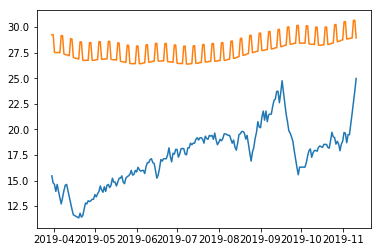

In [56]:
fig = plt.plot(forecast_data.ds[len(forecast_data)-len(test['<Close>']):],test['<Close>'])
fig = plt.plot(forecast_data.ds[len(forecast_data)-len(test['<Close>']):],forecast_data.yhat[len(forecast_data)-len(test['<Close>']):])

In [52]:
forecast_data.yhat[len(forecast_data)-len(test['<Close>']):].shape

(227,)

In [55]:
forecast_data.ds[len(forecast_data)-len(test['<Close>']):].shape

(227,)

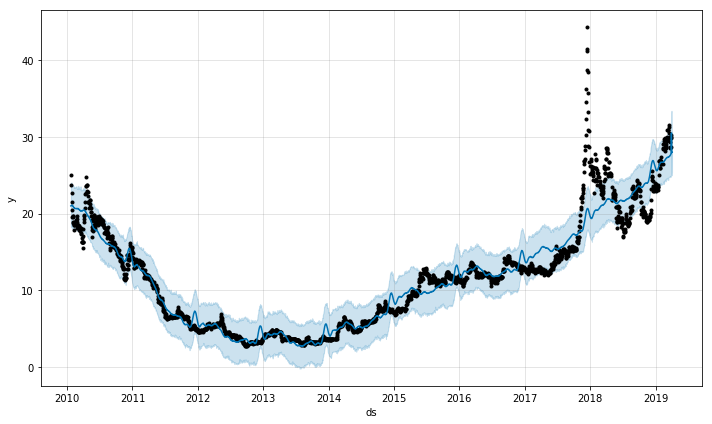

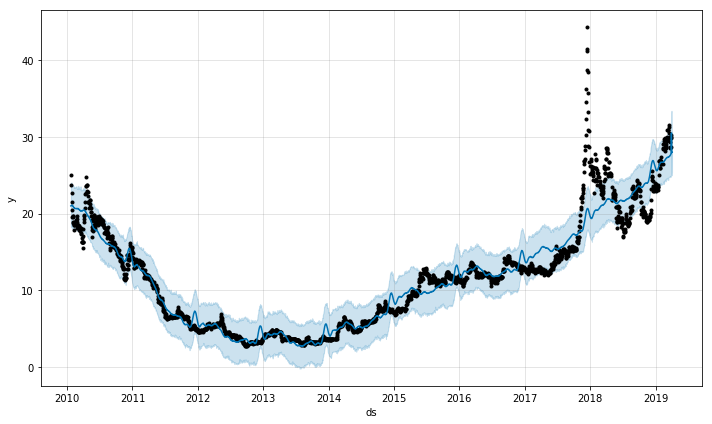

In [14]:
model.plot(forecast_data)

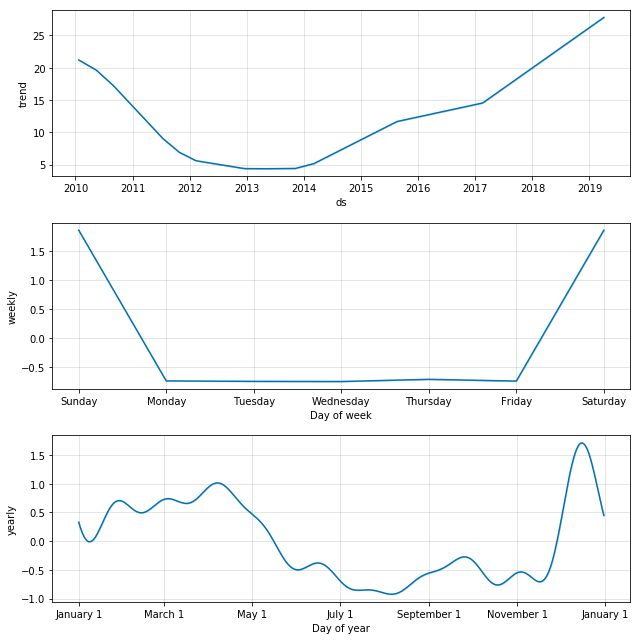

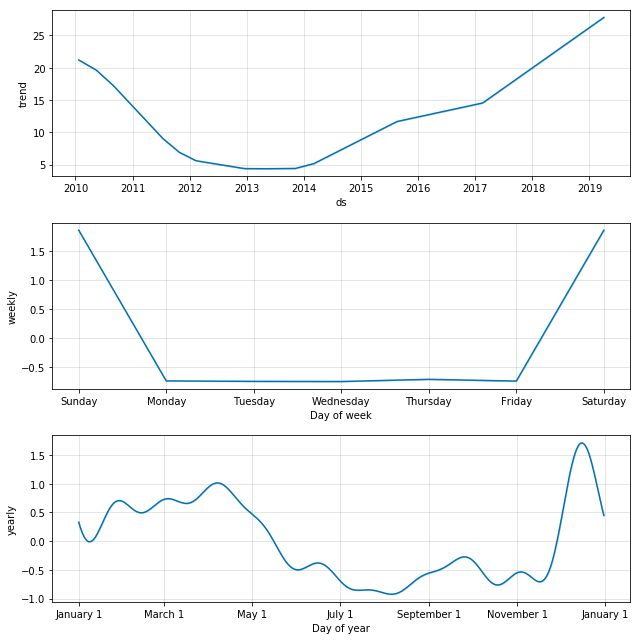

In [15]:
model.plot_components(forecast_data)

In [57]:
cmg.set_index('<DTYYYYMMDD>',inplace=True)

In [58]:
cmg.drop(['index', '<Ticker>','<Open>','<High>','<Volume>','<Low>'], inplace=True, axis = 1)

In [59]:
cmg.index = pd.to_datetime(cmg.index.astype(str), format = '%Y%m%d')

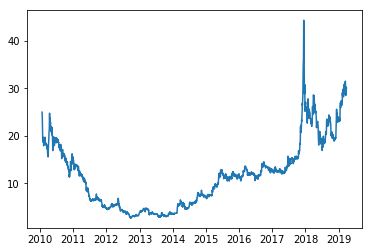

In [60]:
plt.plot(cmg)

In [61]:
cmg = cmg[::-1]

In [62]:
x = cmg.rolling(5).mean()
x

,<Close>
<DTYYYYMMDD>,
2010-01-22,NaN
2010-01-25,NaN
2010-01-26,NaN
2010-01-27,NaN
2010-01-28,22.68208
2010-01-29,21.58294
2010-02-01,20.72648
2010-02-02,19.94138
2010-02-03,19.55596


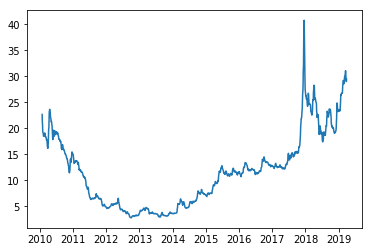

In [63]:
plt.plot(x)

In [64]:
cmg.index

DatetimeIndex(['2010-01-22', '2010-01-25', '2010-01-26', '2010-01-27',
               '2010-01-28', '2010-01-29', '2010-02-01', '2010-02-02',
               '2010-02-03', '2010-02-04',
               ...
               '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21',
               '2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27',
               '2019-03-28', '2019-03-29'],
              dtype='datetime64[ns]', name='<DTYYYYMMDD>', length=2275, freq=None)

In [65]:
close = cmg['<Close>']

In [66]:
type(close)

pandas.core.series.Series

In [67]:
close

<DTYYYYMMDD>
2010-01-22    24.9803
2010-01-25    23.7669
2010-01-26    22.6250
2010-01-27    21.5544
2010-01-28    20.4838
2010-01-29    19.4846
2010-02-01    19.4846
2010-02-02    18.6995
2010-02-03    19.6273
2010-02-04    19.6987
2010-02-05    18.8423
2010-02-08    18.5568
2010-02-09    17.9144
2010-02-10    18.5568
2010-02-11    18.8423
2010-02-12    18.5568
2010-02-22    19.1991
2010-02-23    19.2737
2010-02-24    19.7185
2010-02-25    18.9031
2010-02-26    18.1618
2010-03-01    18.2359
2010-03-02    18.5325
2010-03-03    18.5325
2010-03-04    18.5325
2010-03-05    18.2359
2010-03-08    18.3101
2010-03-09    18.3842
2010-03-10    18.2359
2010-03-11    17.8653
               ...   
2019-02-18    29.4000
2019-02-19    29.7000
2019-02-20    29.8000
2019-02-21    28.6500
2019-02-22    28.6000
2019-02-25    28.2000
2019-02-26    28.5000
2019-02-27    29.0000
2019-02-28    28.6500
2019-03-01    28.7500
2019-03-04    29.8000
2019-03-05    30.8500
2019-03-06    30.0000
2019-03-07    29.50

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

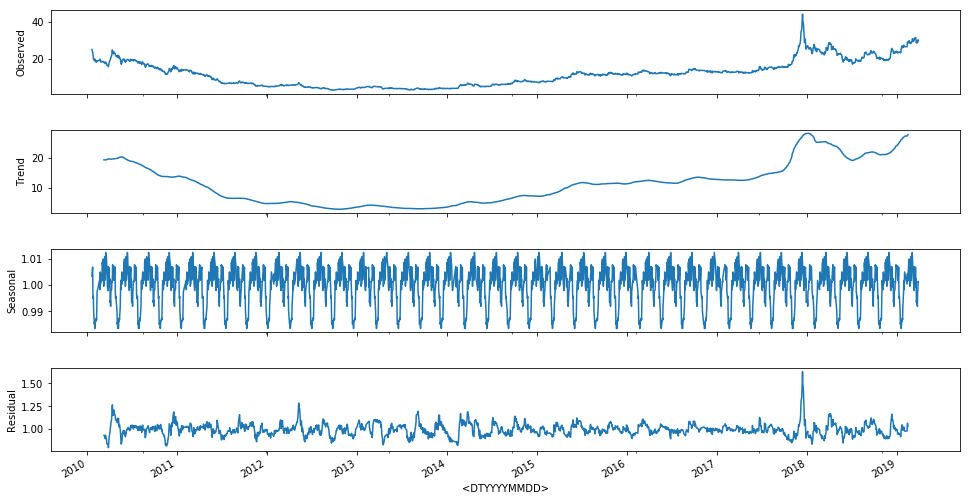

In [90]:
decomp = seasonal_decompose(close, freq = 60, model='multiplicative')
fig = decomp.plot()
fig.set_size_inches(15,8)

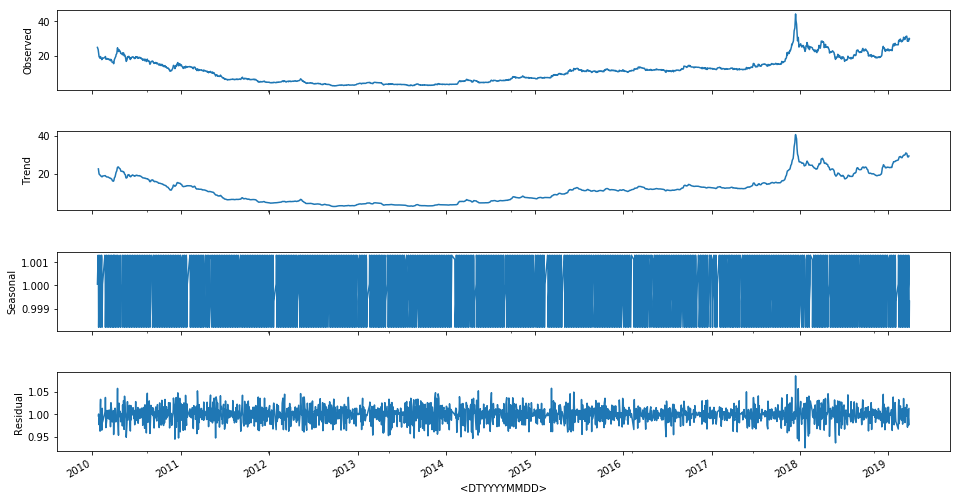

In [87]:
decomp = seasonal_decompose(close, freq = 5, model='multiplicative')
fig = decomp.plot()
fig.set_size_inches(15,8)

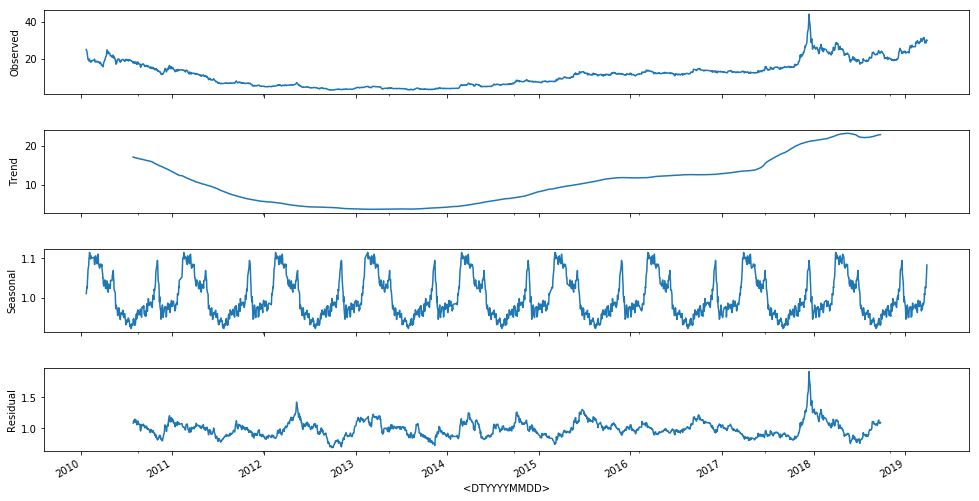

In [88]:
decomp = seasonal_decompose(close, freq = 252, model='multiplicative')
fig = decomp.plot()
fig.set_size_inches(15,8)

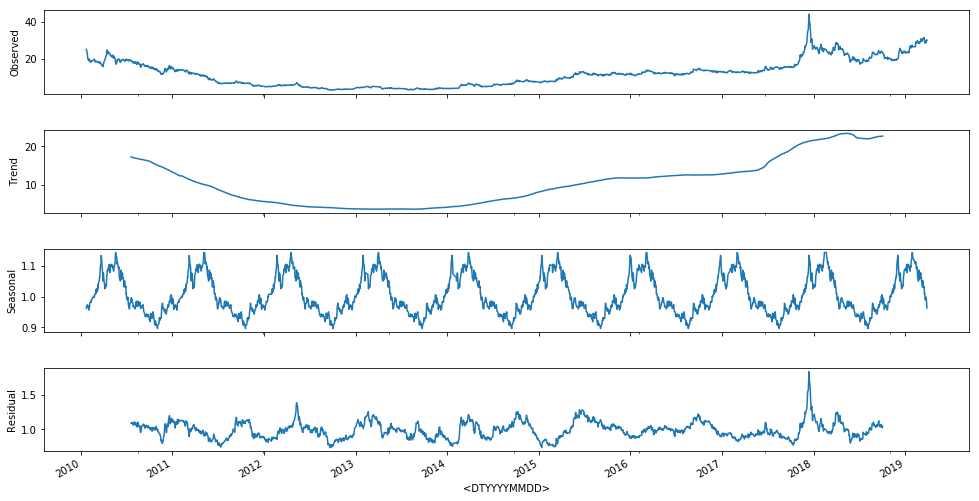

In [89]:
decomp = seasonal_decompose(close, freq = 240, model='multiplicative')
fig = decomp.plot()
fig.set_size_inches(15,8)

In [91]:
from statsmodels.tsa.stattools import adfuller

In [93]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Argumented Dickey-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','Number of Observations used']
    
    for value,label in zip(result,labels):
        print (label+ " : "+str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence againt null hypothesis")
        print("Reject null hypothesis")
        print("Data is stationary")      
    else:
        print("Weak evidence againt null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data is non - stationary")

In [94]:
adf_check(cmg['<Close>'])

Argumented Dickey-Fuller Test
ADF Test Statistic : -0.373834810978408
p-value : 0.9143766199523653
# of lags : 26
Number of Observations used : 2248
Weak evidence againt null hypothesis
Fail to reject null hypothesis
Data is non - stationary


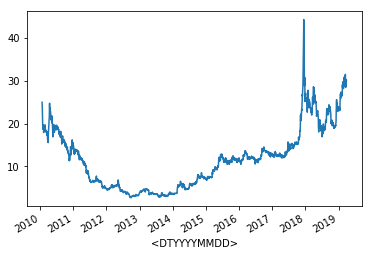

In [103]:
cmg['<Close>'].plot()

In [108]:
cmg['First Difference'] = cmg['<Close>'] - cmg['<Close>'].shift(1)

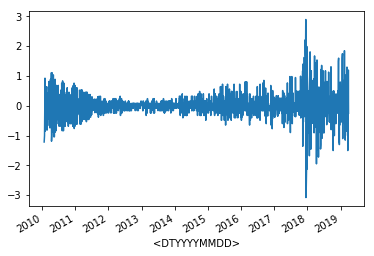

In [109]:
cmg['First Difference'].plot()

In [111]:
adf_check(cmg['First Difference'].dropna())

Argumented Dickey-Fuller Test
ADF Test Statistic : -9.430702467360343
p-value : 5.199554476964968e-16
# of lags : 27
Number of Observations used : 2246
Strong evidence againt null hypothesis
Reject null hypothesis
Data is stationary


In [112]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

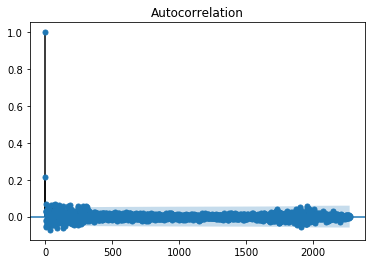

In [113]:
fig_first = plot_acf(cmg['First Difference'].dropna())

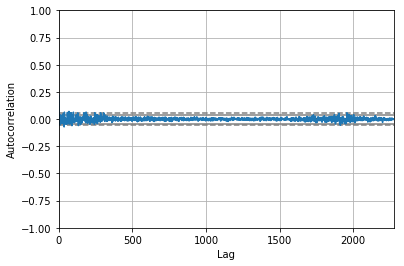

In [115]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(cmg['First Difference'].dropna())

In [118]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [119]:
model = sm.tsa.statespace.SARIMAX(cmg['<Close>'],order=(0,1,0),seasonal_order=(1,1,1,20))

/Users/nhatson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [120]:
result = model.fit()

In [121]:
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            <Close>   No. Observations:                 2275
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 20)   Log Likelihood               -1232.275
Date:                            Fri, 12 Apr 2019   AIC                           2470.549
Time:                                    17:08:51   BIC                           2487.711
Sample:                                         0   HQIC                          2476.812
                                           - 2275                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L20       0.0090      0.014      0.655      0.512      -0.018       0.036
ma.S.L20      -0.9624      0.007   

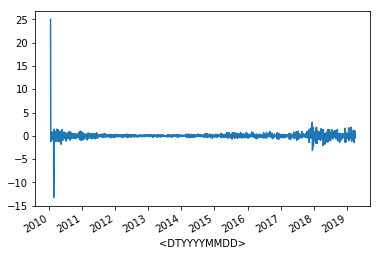

In [122]:
result.resid.plot()

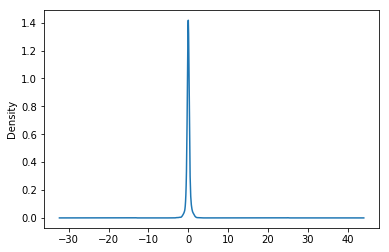

In [123]:
result.resid.plot(kind='kde')

In [136]:
cmg['forecast'] = result.predict(start=150,end=250)

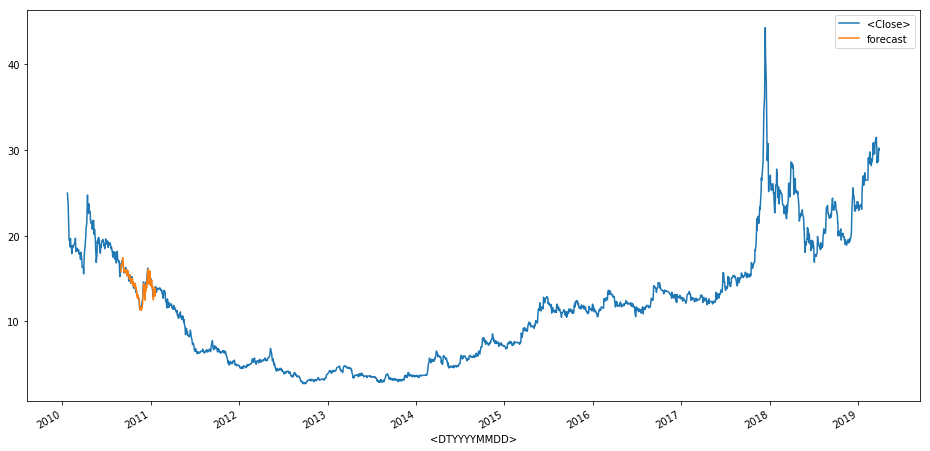

In [137]:
cmg[['<Close>','forecast']].plot(figsize=(16,8))

In [65]:
from fbprophet import Prophet
df.columns = ['ds', 'y']

In [63]:
df = df[::-1]

In [71]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
future_stock_data = model.make_future_dataframe(periods=2000, freq = 'd')

In [73]:
forecast_data = model.predict(future_stock_data)

In [76]:
# plt.plot(df.ds,df.y)
# plt.plot(forecast_data.ds,forecast_data.yhat)

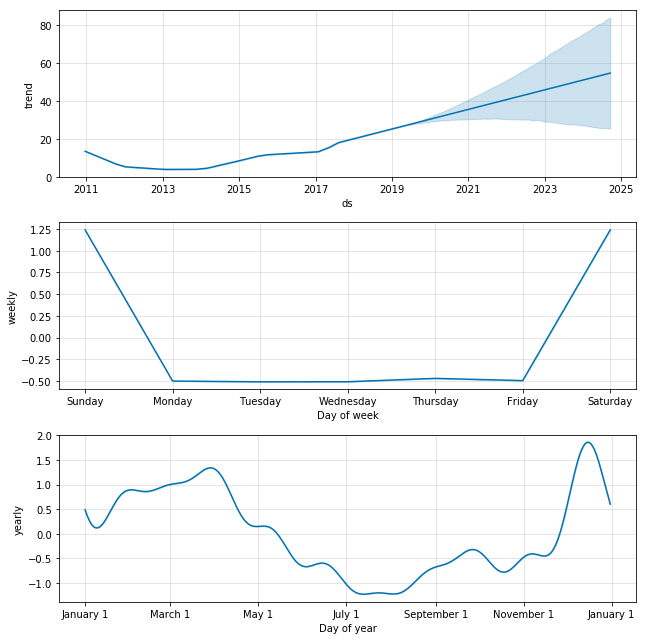

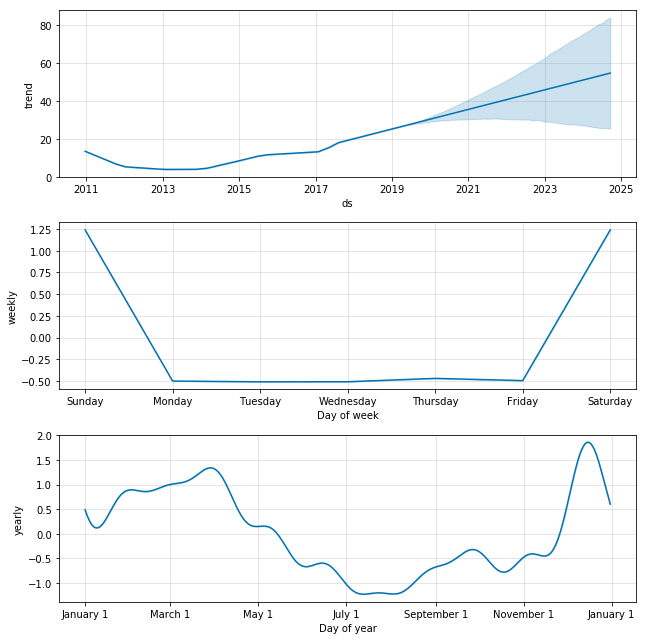

In [75]:
model.plot_components(forecast_data)